In [2]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 103.4 kB/s eta 0:16:04
   ---------------------------------------- 0.1/99.8 MB 148.8 kB/s eta 0:11:10
   ---------------------------------------- 0.1/99.8 MB 157.1 kB/s eta 0:10:35
   ---------------------------------------- 0.1/99.8 MB 196.5 kB/s eta 0:08:28
   ---------------------------------------- 0.1/99.8 MB 196.5 kB/s eta 0:08:28
   ------

In [1]:
# importing required libraries
import numpy as np      # numerical operations
import pandas as pd     # dataframe handling
import seaborn as sns   # visualization
import matplotlib.pyplot as plt # visualization

import warnings         # ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # normalizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error   # error analysis

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet     # regression models
from sklearn.ensemble import RandomForestRegressor                              # regression model
from xgboost import XGBRegressor                                                # regression model
from sklearn.svm import SVR                                                     # regression model
from sklearn.preprocessing import PolynomialFeatures                            # regression model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score                                      # check accuracy
from sklearn.model_selection import RandomizedSearchCV                          # hyperparameter tuning

In [2]:
# determining location of source data
import os
for dirname, _, filenames in os.walk('C:\\Users\\usman\\Documents\\UsedCarEvaluation\\carlistings.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# importing data
df = pd.read_csv('C:\\Users\\usman\\Documents\\UsedCarEvaluation\\carlistings.csv')
df.head()

,ListingID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,3,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,8000.0
2,4,Audi A4 New 2.0 TDI Multitronic,Lahore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,23653.0
3,6,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,7,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0


In [4]:
# Dropping the 'ID' column
df.drop(['ListingID'], axis=1, inplace=True)

# Display the DataFrame after dropping the column
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,8000.0
2,Audi A4 New 2.0 TDI Multitronic,Lahore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,23653.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0


In [5]:
df.columns = ['Car', 'Location', 'Year', 'ODO', 'Fuel', 'Transmission', 'Owner', 'Mileage', 'Engine', 'Power', 'Seats', 'CP', 'SP']
df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,8000.0
2,Audi A4 New 2.0 TDI Multitronic,Lahore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,23653.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0


In [6]:
df = df[df['Owner'] != 'Second']
df.drop('Owner', axis=1, inplace=True)

In [7]:
df.isna().sum()

Car               0
Location          0
Year              0
ODO               0
Fuel              0
Transmission      0
Mileage           0
Engine            2
Power             2
Seats             0
CP              192
SP                0
dtype: int64

In [8]:
# replacing NaN values with 0
df['CP'].fillna(0, inplace=True)

for index, row in df.iterrows():
    if type(row['CP']) == str and 'Lakh' in row['CP']:
        converted_value = float(row['CP'].replace(' Lakh', '')) 
        df.at[index, 'CP'] = converted_value

    if type(row['CP']) == str and 'Cr' in row['CP']:
        converted_value = float(row['CP'].replace(' Cr', ''))*100
        df.at[index, 'CP'] = converted_value

df['CP'] = df['CP'].astype(float)

df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.54 kmpl,1598 CC,103.6 bhp,5,0.0,6933.0


In [9]:
# dropping
df = df.dropna()

# validating
df.isna().sum()

Car             0
Location        0
Year            0
ODO             0
Fuel            0
Transmission    0
Mileage         0
Engine          0
Power           0
Seats           0
CP              0
SP              0
dtype: int64

In [10]:
def extract_units(strings):
    units = set()
    for value in strings:
        words = value.split()
        for i in range(len(words) - 1):
            unit = words[i + 1]
            if unit in units:
                continue
            else:
                units.add(unit)
    return units

In [11]:
# finding unique units
mileage_units = extract_units(df['Mileage'])
print(f'Unique Mileage units: {mileage_units}')

mileage_units = extract_units(df['Engine'])
print(f'Unique Engine volume units: {mileage_units}')

mileage_units = extract_units(df['Power'])
print(f'Unique Power units: {mileage_units}')

Unique Mileage units: {'kmpl', 'km/kg'}
Unique Engine volume units: {'CC'}
Unique Power units: {'bhp'}


In [12]:
# stripping off units
df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float)
df['Power'] = df['Power'].str.replace(' bhp', '').astype(float)

df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,13 km/kg,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.77 kmpl,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.08 kmpl,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.36 kmpl,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.54 kmpl,1598.0,103.60,5,0.0,6933.0


In [13]:
# kmpl = (km/kg)/denstiy
# density of petrol = 0.740 (avg)
# density of diesel = 0.832 (avg)

# defining conditions
condition = (df['Mileage'].str.contains('km/kg'))

# applying condition 1
for index, row in df[condition].iterrows():
    if row['Fuel'] == 'Diesel':
        # Strip away 'km/kg' and convert to float for petrol
        converted_value = float(row['Mileage'].replace(' km/kg', '')) / 0.740  # Replace 0.8 with your specific conversion factor
        df.at[index, 'Mileage'] = converted_value

    if row['Fuel'] == 'Petrol':
        # Strip away 'km/kg' and convert to float for petrol
        converted_value = float(row['Mileage'].replace(' km/kg', '')) / 0.832  # Replace 0.8 with your specific conversion factor
        df.at[index, 'Mileage'] = converted_value


df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,15.625,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.77 kmpl,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.08 kmpl,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.36 kmpl,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.54 kmpl,1598.0,103.60,5,0.0,6933.0


In [14]:
for index, row in df.iterrows():
    if type(row['Mileage']) == str and ' kmpl' in row['Mileage']:
        # Replace ' km/l' and convert to float
        df.at[index, 'Mileage'] = row['Mileage'].replace(' kmpl', '')

df['Mileage'] = df['Mileage'].astype(float)
df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,15.625,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.770,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.080,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.360,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.540,1598.0,103.60,5,0.0,6933.0


In [15]:
df['Age'] = 2023 - df['Year']
df.drop('Year', axis = 1, inplace = True)

df.head()

,Car,Location,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP,Age
0,Honda Jazz V,Islamabad,46000,Petrol,Manual,15.625,1199.0,88.70,5,11480.0,6000.0,12
1,Subaru Forester,Islamabad,87000,Diesel,Manual,20.770,1248.0,88.76,7,0.0,8000.0,11
3,Nissan Micra Diesel XV,Rawalpindi,86999,Diesel,Manual,23.080,1461.0,63.10,5,6000.0,4666.0,10
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,36000,Diesel,Automatic,11.360,2755.0,171.50,8,28000.0,23333.0,7
5,Volkswagen Vento Diesel Comfortline,Karachi,64430,Diesel,Manual,20.540,1598.0,103.60,5,0.0,6933.0,10


In [16]:
df = df[['Car', 'Location', 'Fuel', 'Transmission', 'ODO', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'SP', 'CP']]
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Honda Jazz V,Islamabad,Petrol,Manual,46000,12,15.625,1199.0,88.70,5,6000.0,11480.0
1,Subaru Forester,Islamabad,Diesel,Manual,87000,11,20.770,1248.0,88.76,7,8000.0,0.0
3,Nissan Micra Diesel XV,Rawalpindi,Diesel,Manual,86999,10,23.080,1461.0,63.10,5,4666.0,6000.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,Diesel,Automatic,36000,7,11.360,2755.0,171.50,8,23333.0,28000.0
5,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,10,20.540,1598.0,103.60,5,6933.0,0.0


In [17]:
# final overview
df.dtypes

Car              object
Location         object
Fuel             object
Transmission     object
ODO               int64
Age               int64
Mileage         float64
Engine          float64
Power           float64
Seats             int64
SP              float64
CP              float64
dtype: object

In [18]:
df['Seats'] = df['Seats'].astype('float64')

# Verify the changes
print(df.dtypes)

Car              object
Location         object
Fuel             object
Transmission     object
ODO               int64
Age               int64
Mileage         float64
Engine          float64
Power           float64
Seats           float64
SP              float64
CP              float64
dtype: object


In [19]:
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Honda Jazz V,Islamabad,Petrol,Manual,46000,12,15.625,1199.0,88.70,5.0,6000.0,11480.0
1,Subaru Forester,Islamabad,Diesel,Manual,87000,11,20.770,1248.0,88.76,7.0,8000.0,0.0
3,Nissan Micra Diesel XV,Rawalpindi,Diesel,Manual,86999,10,23.080,1461.0,63.10,5.0,4666.0,6000.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,Diesel,Automatic,36000,7,11.360,2755.0,171.50,8.0,23333.0,28000.0
5,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,10,20.540,1598.0,103.60,5.0,6933.0,0.0


In [20]:
# building dataset 1
df_1 = df[df['CP'] == 0]
df_1.drop('CP', axis=1, inplace=True)
df_1 = df_1.reset_index(drop = True)

# building dataset 2
df_2 = df[df['CP'] != 0]
df_2 = df_2.reset_index(drop = True)

In [21]:
# exporting df_1 for later
df_1.to_csv('test.csv', index=False)
df_2.to_csv('train.csv', index=False)

In [22]:
df = df_1
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP
0,Subaru Forester,Islamabad,Diesel,Manual,87000,11,20.77,1248.0,88.76,7.0,8000.0
1,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,10,20.54,1598.0,103.60,5.0,6933.0
2,Honda City 1.5 V AT Sunroof,Faislabad,Petrol,Automatic,60000,11,16.80,1497.0,116.30,5.0,5986.0
3,Land Rover Range Rover 2.2L Pure,Hyderabad,Diesel,Automatic,72000,9,12.70,2179.0,187.70,5.0,36000.0
4,Honda Amaze S i-Dtech,Multan,Diesel,Manual,58950,7,25.80,1498.0,98.60,5.0,7200.0


In [23]:
# updating current dataframe
df = df_2
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Honda Jazz V,Islamabad,Petrol,Manual,46000,12,15.625,1199.0,88.70,5.0,6000.0,11480.0
1,Nissan Micra Diesel XV,Rawalpindi,Diesel,Manual,86999,10,23.080,1461.0,63.10,5.0,4666.0,6000.0
2,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,Diesel,Automatic,36000,7,11.360,2755.0,171.50,8.0,23333.0,28000.0
3,Nissan Leaf,Multan,Petrol,Manual,25692,5,21.560,1462.0,103.25,5.0,13266.0,14200.0
4,Mazda CX-5,Rawalpindi,Diesel,Manual,64424,8,25.200,1248.0,74.00,5.0,7466.0,10000.0


In [24]:
# statistical summary
df.describe()

,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
count,57.000000,57.00000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,47260.719298,7.54386,18.975175,1682.771930,127.779825,5.333333,17308.228070,29484.444444
std,30121.839569,2.36847,5.240375,581.311541,70.348868,1.023533,16654.676809,33445.992792
min,1000.000000,4.00000,0.000000,998.000000,63.100000,2.000000,3466.000000,6000.000000
25%,25692.000000,6.00000,15.625000,1248.000000,78.900000,5.000000,5266.000000,11120.000000
50%,43000.000000,7.00000,19.150000,1462.000000,103.250000,5.000000,11506.000000,15746.666667
75%,56087.000000,9.00000,22.900000,1995.000000,163.700000,5.000000,23333.000000,31520.000000
max,143275.000000,15.00000,28.400000,2996.000000,444.000000,8.000000,81720.000000,170666.666667


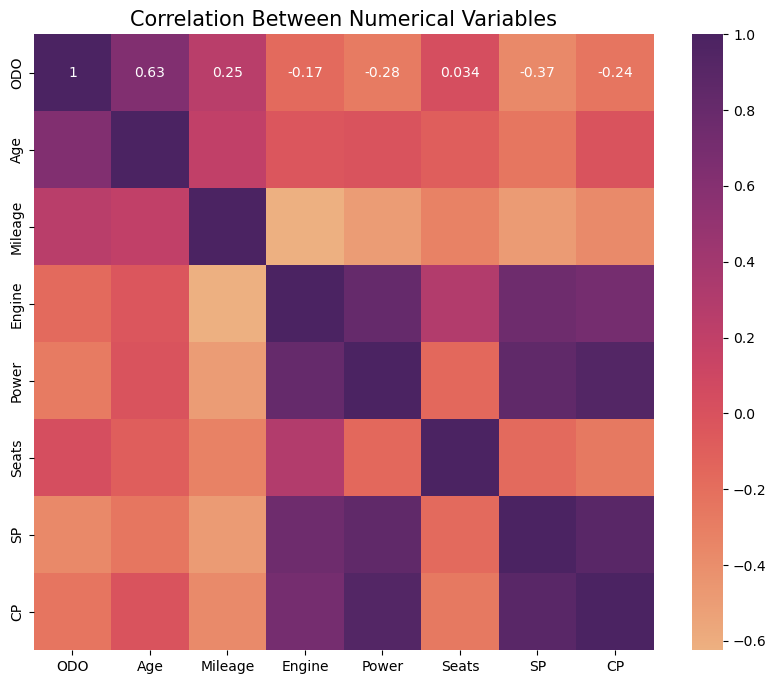

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 4:].corr(), cmap='flare', annot=True)
plt.title("Correlation Between Numerical Variables", size=15)
plt.show()

In [26]:
# determinig relevant numerical columns
num_cols = list(df.iloc[:,4:].corr()["CP"][(df.iloc[:,4:].corr()["CP"]>0.75) | (df.iloc[:,4:].corr()["CP"]<-0.75)].index)

# naming categorical columns
cat_cols = ["Location", "Fuel", "Transmission"]

# saving all relevant columns
relevant_cols = cat_cols + num_cols

# reframing data
df = df[relevant_cols]

df.head()

,Location,Fuel,Transmission,Power,SP,CP
0,Islamabad,Petrol,Manual,88.70,6000.0,11480.0
1,Rawalpindi,Diesel,Manual,63.10,4666.0,6000.0
2,Quetta,Diesel,Automatic,171.50,23333.0,28000.0
3,Multan,Petrol,Manual,103.25,13266.0,14200.0
4,Rawalpindi,Diesel,Manual,74.00,7466.0,10000.0


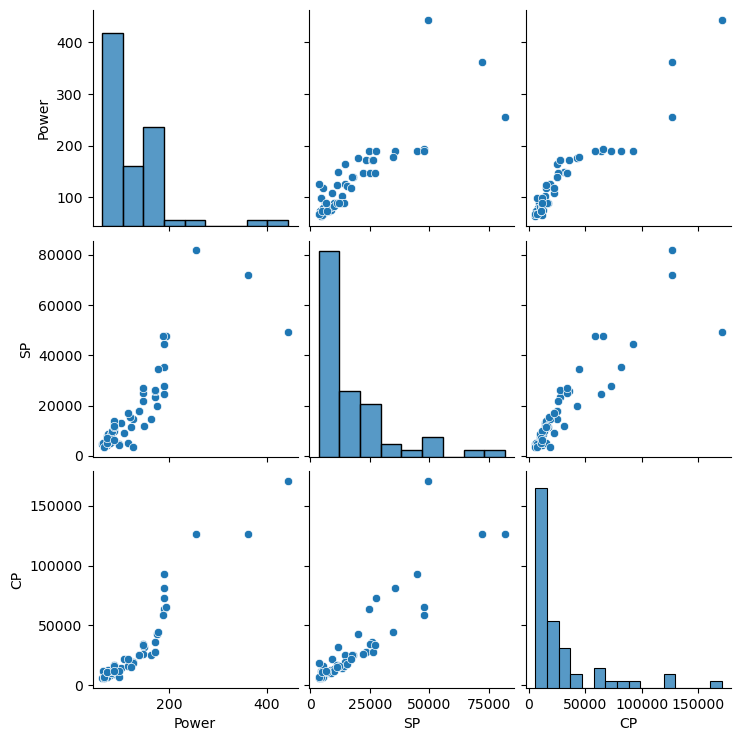

In [27]:
# glancing at data
sns.pairplot(df[relevant_cols])

In [28]:
# feature matrix
X = df.drop('CP', axis=1)

# target variabele
y = df['CP']

In [29]:
X.head()

,Location,Fuel,Transmission,Power,SP
0,Islamabad,Petrol,Manual,88.70,6000.0
1,Rawalpindi,Diesel,Manual,63.10,4666.0
2,Quetta,Diesel,Automatic,171.50,23333.0
3,Multan,Petrol,Manual,103.25,13266.0
4,Rawalpindi,Diesel,Manual,74.00,7466.0


In [30]:
# shape before encoding
print(X.shape)

# encoding
X = pd.get_dummies(X, columns=cat_cols)

# shape after encoding
print(X.shape)

(57, 5)
(57, 17)


In [31]:
X.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,88.70,6000.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
1,63.10,4666.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
2,171.50,23333.0,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
3,103.25,13266.0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True
4,74.00,7466.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True


In [32]:
# new categorical columns
cat_cols = X.iloc[:,2:].columns
cat_cols

Index(['Location_Abbottabad', 'Location_Chitral', 'Location_Faislabad',
       'Location_Hyderabad', 'Location_Islamabad', 'Location_Karachi',
       'Location_Lahore', 'Location_Multan', 'Location_Peshawar',
       'Location_Quetta', 'Location_Rawalpindi', 'Fuel_Diesel', 'Fuel_Petrol',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [33]:
num_cols = ['Power', 'SP']

In [34]:
# standardizing
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X[cat_cols] = X[cat_cols].astype(int)

X.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,-0.560453,-0.685018,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,-0.927588,-0.765827,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,0.627001,0.364962,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,-0.351788,-0.244866,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,-0.771269,-0.596212,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [36]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [37]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

# data processing function for models
def process(model, y_test, predictions):
    # determining error values
    mae, mse, rmse, r_squared = evaluation(y_test, predictions)
    print("Model:", model)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r_squared)

    # Create a new DataFrame for the Linear model
    new_row = pd.DataFrame({
        "Model": model,
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R2 Score": [r_squared],
    })

    return new_row;

In [38]:
# performing linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

# process data for Elastic Net
new_row = process("Linear", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Linear
MAE: 10981.724562368532
MSE: 183481906.72382116
RMSE: 13545.549332670904
R2 Score: 0.465012413728239


In [39]:
# performing ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

# process data for Ridge Regressor
new_row = process("Ridge", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Ridge
MAE: 9358.34964476664
MSE: 134764801.52934524
RMSE: 11608.824295739221
R2 Score: 0.6070593707471155


In [40]:
# performing ridge regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

# process data for Lasso Regressor
new_row = process("Lasso", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Lasso
MAE: 10966.308219317445
MSE: 183005008.92430604
RMSE: 13527.93439237144
R2 Score: 0.4664029290505206


In [41]:
# performing ridge regression
ridge = ElasticNet()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

# process data for Elastic Net
new_row = process("Elastic Net", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Elastic Net
MAE: 6453.724736018075
MSE: 96526825.86999115
RMSE: 9824.806658148096
R2 Score: 0.7185517934452732


In [42]:
# Define the hyperparameter grid for SVM
parameters_svm = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel (only for poly kernel)
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Kernel coefficient (only for rbf, poly, and sigmoid kernels)
    'epsilon': np.linspace(0.1, 1.0, 10)  # Epsilon in the epsilon-SVR model
}

# initializing regressor
svm_regressor = SVR()

# Create a RandomizedSearchCV object
random_cv_svm = RandomizedSearchCV(
    estimator=svm_regressor,
    param_distributions=parameters_svm,
    n_iter=10,
    scoring='neg_mean_absolute_error',  # Use an appropriate scoring metric
    random_state=42,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_cv_svm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'degree': [2, 3, 4, 5],
                                        'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1.0, 10.0, 100.0,
                                                  1000.0],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [43]:
# checking best parameters
random_cv_svm.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'degree': 5, 'C': 100.0}

In [44]:
# performing ridge regression
svr = SVR(kernel='rbf', gamma='auto', epsilon=0.2, degree=5, C=100.0)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

# process data for SVR
new_row = process("SVR", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: SVR
MAE: 10563.262591847688
MSE: 347015179.8521456
RMSE: 18628.343454321042
R2 Score: -0.011809920572718458


In [45]:
# defining hyper parameter grid for Random Forest Regression
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Use valid criterion values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest = RandomForestRegressor()

random_cv = RandomizedSearchCV(
    estimator=random_forest, 
    param_distributions=parameters, 
    n_iter=10, scoring ='neg_mean_absolute_error',
    random_state=42, 
    cv=5, 
    verbose=2, 
    n_jobs=-1)

random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 6, 7, 8,
                                                             9, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [46]:
# looking at best
random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'poisson'}

In [47]:
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features='log2', max_depth=50, criterion='friedman_mse')
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

# process data for Random Forest Regressor
new_row = process("Random Forest", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Random Forest
MAE: 5282.119778653216
MSE: 56292655.37200496
RMSE: 7502.843152565897
R2 Score: 0.8358646236022186


In [48]:
# Define the hyperparameter grid for XGBoost
parameters_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Create an XGBoost regressor
xgb = XGBRegressor()

# Create a RandomizedSearchCV object
random_cv_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=parameters_xgb,
    n_iter=10,
    scoring='neg_mean_absolute_error',  # Use an appropriate scoring metric
    random_state=42,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_cv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [49]:
random_cv_xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.1,
 'reg_alpha': 1.0,
 'n_estimators': 400,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.9}

In [50]:
# Define the hyperparameters
xgb_params = {
    'subsample': 1.0,
    'reg_lambda': 0,
    'n_estimators': 300,
    'reg_alpha': 0.5,
    'max_depth': 4,
    'learning_rate': 0.2,
    'gamma': 1,
    'colsample_bytree': 0.9
}

# Create an XGBoost regressor with specified hyperparameters
xgb = XGBRegressor(**xgb_params)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb.predict(X_test)

# Process data for XGBoost Regressor
new_row = process("XG Boost", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: XG Boost
MAE: 4170.376123046875
MSE: 50278283.224643454
RMSE: 7090.718103594548
R2 Score: 0.8534010362954888


In [51]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

# process data for Random Forest Regressor
new_row = process("Polynomial", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Polynomial
MAE: 10189391.643126303
MSE: 205642726152831.12
RMSE: 14340248.469006076
R2 Score: -599602.021699821


In [52]:
# comparing model performance
models

,Model,MAE,MSE,RMSE,R2 Score
0,Linear,1.098172e+04,1.834819e+08,1.354555e+04,0.465012
1,Ridge,9.358350e+03,1.347648e+08,1.160882e+04,0.607059
2,Lasso,1.096631e+04,1.830050e+08,1.352793e+04,0.466403
3,Elastic Net,6.453725e+03,9.652683e+07,9.824807e+03,0.718552
4,SVR,1.056326e+04,3.470152e+08,1.862834e+04,-0.011810
5,Random Forest,5.282120e+03,5.629266e+07,7.502843e+03,0.835865
6,XG Boost,4.170376e+03,5.027828e+07,7.090718e+03,0.853401
7,Polynomial,1.018939e+07,2.056427e+14,1.434025e+07,-599602.021700


In [53]:
mae_score = models["MAE"]
models[models["MAE"] == min(mae_score)]

,Model,MAE,MSE,RMSE,R2 Score
6,XG Boost,4170.376123,5.027828e+07,7090.718104,0.853401


In [54]:
# predicting initial cost price
y_pred = xgb.predict(X_test)

# comparing side by side
df_combined = pd.DataFrame({'Actual CP': y_test, 'Predicted CP': y_pred})
df_combined['Predicted CP'] = ((100*(df_combined['Predicted CP'].round(2))).astype(int))/100
df_combined.head(10)

,Actual CP,Predicted CP
44,7053.333333,7915.06
29,25000.000000,25046.21
35,9853.333333,11598.84
51,11120.000000,7993.02
23,36000.000000,32787.63
46,27653.333333,33686.38
28,19253.333333,18403.56
0,11480.000000,8925.25
30,6040.000000,11167.37
1,6000.000000,8816.29


In [55]:
# checking correlation between two columns
correlation = np.corrcoef(y_test, y_pred)[0, 1]
correlation

0.9579248681415151

In [56]:
# importing final test data
final_test = pd.read_csv("test.csv")
final_test.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP
0,Subaru Forester,Islamabad,Diesel,Manual,87000,11,20.77,1248.0,88.76,7.0,8000.0
1,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,10,20.54,1598.0,103.60,5.0,6933.0
2,Honda City 1.5 V AT Sunroof,Faislabad,Petrol,Automatic,60000,11,16.80,1497.0,116.30,5.0,5986.0
3,Land Rover Range Rover 2.2L Pure,Hyderabad,Diesel,Automatic,72000,9,12.70,2179.0,187.70,5.0,36000.0
4,Honda Amaze S i-Dtech,Multan,Diesel,Manual,58950,7,25.80,1498.0,98.60,5.0,7200.0


In [57]:
static_test = final_test[["Car", "ODO", "Age", "Mileage", "Engine", "Seats"]]
predict_y = final_test[["Location", "Fuel", "Transmission", "Power", "SP"]]

In [58]:
# encoding
num_cols = ['Power', 'SP']
cat_cols = ["Location", "Fuel", "Transmission"]

predict_y  = pd.get_dummies(predict_y, columns=cat_cols)

predict_y.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,88.76,8000.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,103.60,6933.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True
2,116.30,5986.0,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False
3,187.70,36000.0,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
4,98.60,7200.0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True


In [59]:
# taking out new categorical columns
cat_cols = predict_y.iloc[:,2:].columns
cat_cols

Index(['Location_Abbottabad', 'Location_Chitral', 'Location_Faislabad',
       'Location_Hyderabad', 'Location_Islamabad', 'Location_Karachi',
       'Location_Lahore', 'Location_Multan', 'Location_Peshawar',
       'Location_Quetta', 'Location_Rawalpindi', 'Fuel_Diesel', 'Fuel_Petrol',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [60]:
# normalizing data
scaler = StandardScaler()
predict_y[num_cols] = scaler.fit_transform(predict_y[num_cols])
predict_y[cat_cols] = predict_y[cat_cols].astype(int)

predict_y.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,-0.425057,-0.327448,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,-0.165789,-0.402089,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0.056091,-0.468336,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,1.303511,1.631283,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,-0.253144,-0.383411,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [61]:
# predict cost prices
y_pred = xgb.predict(predict_y)

# convert them into dataframe
df_pred = pd.DataFrame({'CP': y_pred})

In [62]:
# rounding to two decimal points
df_pred = ((100*(df_pred['CP'].round(2))).astype(int))/100
df_pred = pd.DataFrame({'CP': df_pred})

In [63]:
# horizontally stacking with main frame
result = pd.concat([final_test, df_pred], axis=1)
result.to_csv('result.csv', index=False)
result.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Subaru Forester,Islamabad,Diesel,Manual,87000,11,20.77,1248.0,88.76,7.0,8000.0,15176.57
1,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,10,20.54,1598.0,103.60,5.0,6933.0,16258.14
2,Honda City 1.5 V AT Sunroof,Faislabad,Petrol,Automatic,60000,11,16.80,1497.0,116.30,5.0,5986.0,18750.41
3,Land Rover Range Rover 2.2L Pure,Hyderabad,Diesel,Automatic,72000,9,12.70,2179.0,187.70,5.0,36000.0,65664.14
4,Honda Amaze S i-Dtech,Multan,Diesel,Manual,58950,7,25.80,1498.0,98.60,5.0,7200.0,15631.57


In [80]:
import pandas as pd
from IPython.display import display, HTML

# Load the data
data = pd.read_csv('result.csv')

# Prepare HTML content
html_content = '<div style="max-width:600px; margin:auto;">'

for index, row in data.iterrows():
    # Format price with two decimal places and dollar sign
    cp_formatted = f"${row['CP']:.2f}"
    sp_formatted = f"${row['SP']:.2f}"
    
    # Create a div for each car with a hover/click event to show details
    html_content += f"""
    <div style="padding: 8px; margin-top: 5px; background-color: #000000; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
        <p style="margin:0; font-weight:bold; cursor:pointer;" onmouseout="hideDetails()" onclick="showDetails(this)">
            {row['Car']}
        </p>
        <div id="info{index}" style="display:none; padding: 8px; font-size: 14px; color: #333; background-color: #fff; border-left: 4px solid #007BFF; margin-top: 5px;">
            <p>Cost Price: {cp_formatted}</p>
            <p>Selling Price: {sp_formatted}</p>
        </div>
    </div>
    """

html_content += '</div>'

# Adding JavaScript
javascript = """
<script type="text/javascript">
function showDetails(element) {
    var infoDiv = element.nextElementSibling;
    if (infoDiv.style.display === 'none') {
        infoDiv.style.display = 'block';
    } else {
        infoDiv.style.display = 'none';
    }
}
function hideDetails() {
    // Optional: Remove this function if you want the details to stay visible until another click
}
</script>
"""

# Display HTML and JavaScript in the notebook
display(HTML(html_content + javascript))
